In [2]:
import numpy as np 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from mpl_toolkits import mplot3d
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.stats import ks_2samp
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
from sklearn.preprocessing import normalize
sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
stats = pd.read_csv('experiment_result.csv')
stats.head()

,Date,CR (0) or HW (1),Time,Topic,Order (L first or T first),LinkedIn Direct,Tumblr -> Buffer -> Linkedin,Tags on L,Views from L,Views from T,Check Time,Possible Reasons
0,7/26/2018,1.0,12:08 PM,lunch reading,L,1.0,1.0,1.0,77.0,25,NaN,The picture quality on LinkedIn is significant...
1,7/26/2018,1.0,18:40PM,productivity,T,1.0,1.0,1.0,156.0,29,NaN,NaN
2,7/26/2018,0.0,18:35PM,productivity,T,1.0,0.0,1.0,102.0,-,NaN,NaN
3,7/27/2018,0.0,7:20 AM,block 1,L,1.0,1.0,1.0,62.0,22,12:21 PM,NaN
4,7/27/2018,1.0,7:23 AM,block 1,L,1.0,1.0,1.0,72.0,18,12;21 PM,NaN


In [14]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 12 columns):
Date                            15 non-null object
CR (0) or HW (1)                14 non-null float64
Time                            14 non-null object
Topic                           14 non-null object
Order (L first or T first)      14 non-null object
LinkedIn Direct                 14 non-null float64
Tumblr -> Buffer -> Linkedin    14 non-null float64
Tags on L                       14 non-null float64
Views from L                    14 non-null float64
Views from T                    14 non-null object
Check Time                      7 non-null object
Possible Reasons                1 non-null object
dtypes: float64(5), object(7)
memory usage: 1.5+ KB


In [27]:
stats['Views from T'] = pd.to_numeric(stats['Views from T'])

ValueError: Unable to parse string "-" at position 2

In [24]:
views = stats.ix[:,['Views from L','Views from T']]
views.head()

,Views from L,Views from T
0,77.0,25
1,156.0,29
2,102.0,-
3,62.0,22
4,72.0,18


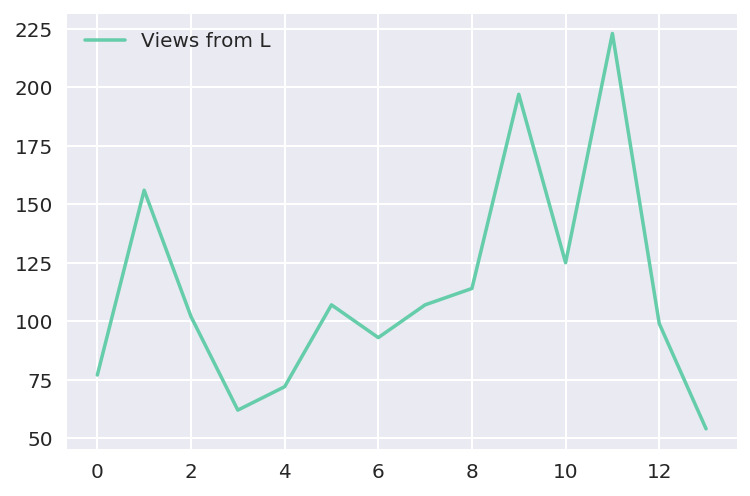

In [25]:
# plt.axvline(x = '2018-07-03 15:20:50.000',color = 'mediumaquamarine',linestyle='--')

plt.figure(figsize=(15,6))
views.plot(color = ['mediumaquamarine','salmon'])
# plt.plot(stats['Views from T'],color ='lightsalmon')